<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

M

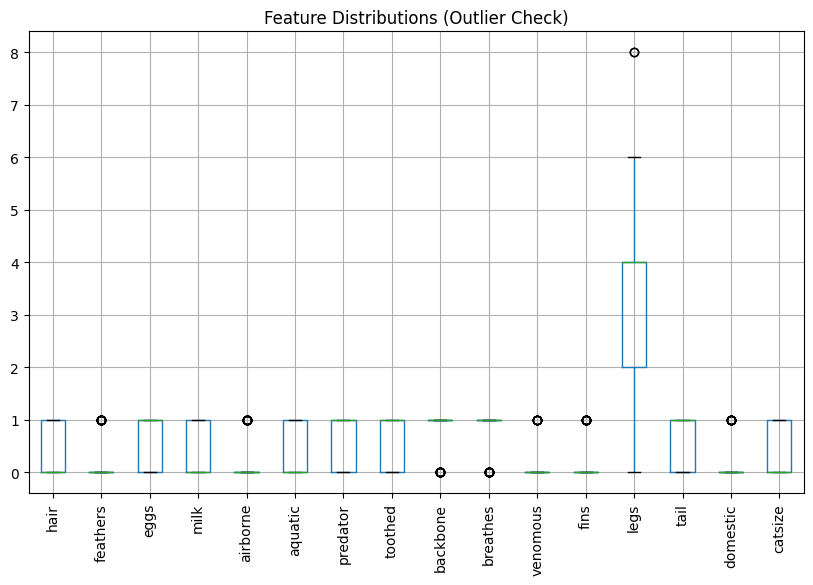


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

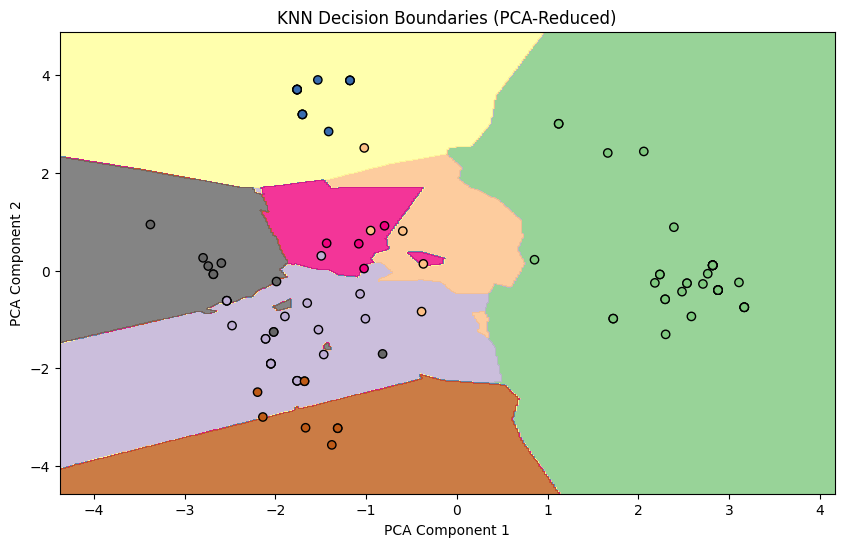

In [17]:
# K-Nearest Neighbors Classifier on Zoo Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from matplotlib.colors import ListedColormap

# Load the dataset
df = pd.read_csv("Zoo.csv")

# Initial inspection
print("\nDataset Info:\n")
print(df.info())

# Rename target column to match expected 'class_type'
df.rename(columns={'type': 'class_type'}, inplace=True)

# Drop non-feature columns (like animal names)
if 'animal name' in df.columns:
    df = df.drop('animal name', axis=1)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Outlier check (optional)
plt.figure(figsize=(10, 6))
df.drop('class_type', axis=1).boxplot(rot=90)
plt.title("Feature Distributions (Outlier Check)")
plt.show()

# Split features and labels
X = df.drop('class_type', axis=1)
y = df['class_type']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train KNN classifier
k = 5  # You can tune this value
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
def print_metrics(y_true, y_pred):
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

print_metrics(y_test, y_pred)

# ---------------------- Decision Boundary Visualization ----------------------
# (Using PCA to reduce dimensions for plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train_pca, y_train_pca)

h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN Decision Boundaries (PCA-Reduced)')
plt.show()

# ---------------------- Interview Questions ----------------------
# Q1. Key hyperparameters in KNN:
#     - n_neighbors (K): number of neighbors to use
#     - metric: distance function (e.g., 'euclidean', 'manhattan')
#     - weights: 'uniform' or 'distance'

# Q2. Distance metrics in KNN:
#     - Euclidean (default)
#     - Manhattan
#     - Minkowski
#     - Cosine (via custom distance function or advanced libraries)

# Q1. Key hyperparameters in KNN:
#     - n_neighbors (K):
#         Controls how many nearest neighbors to use when making predictions.
#         A small value (like 1) can lead to overfitting, while a large value can lead to underfitting.
#
#     - metric:
#         Defines the distance metric used to identify nearest neighbors.
#         Common values: 'euclidean', 'manhattan', 'minkowski'.
#
#     - weights:
#         Determines whether all neighbors contribute equally or if closer neighbors have more influence.
#         Options:
#             - 'uniform' (default): All neighbors have equal weight.
#             - 'distance': Closer neighbors have greater influence.
#
#     - algorithm:
#         The algorithm used to compute the nearest neighbors.
#         Options:
#             - 'auto' (default): Automatically chooses the best method.
#             - 'ball_tree', 'kd_tree', 'brute'
#
#     - leaf_size:
#         Affects the speed of the tree-based algorithms. Relevant when using 'ball_tree' or 'kd_tree'.



# Q2. Distance metrics in KNN:
#     KNN uses a distance metric to determine the "closeness" of data points. The most common ones include:
#
#     - Euclidean Distance:
#         Straight-line distance between two points in Euclidean space.
#         Formula: sqrt(Σ(xi - yi)^2)
#         Best for dense, continuous data with similar scales.
#
#     - Manhattan Distance (a.k.a. L1 Norm or City Block):
#         Sum of absolute differences across dimensions.
#         Formula: Σ|xi - yi|
#         Useful for high-dimensional or sparse data.
#
#     - Minkowski Distance:
#         Generalization of both Euclidean and Manhattan distances.
#         Formula: (Σ|xi - yi|^p)^(1/p)
#         By setting p=1 => Manhattan, p=2 => Euclidean.
#
#     - Cosine Similarity (converted to a distance):
#         Measures angle between two vectors (not magnitude).
#         Often used in text classification or high-dimensional sparse data.
#         Note: Not natively supported in scikit-learn's KNN but can be implemented via custom functions.
#
#     - Hamming Distance:
#         Number of positions at which the corresponding elements are different.
#         Used for categorical variables or binary data.
#
#     The choice of distance metric should depend on the data characteristics.
